In [7]:
from avro.datafile import DataFileReader
from avro.io import DatumReader
import matplotlib.pyplot as plt
from datetime import datetime
import json
import os
import pytz
import numpy as np
import pandas as pd
import re

In [9]:
#define path, folders, user 
participant_data_path = 'C:\\Users\\galey\\Desktop\\sensors_project\\Empatica2\\1\\1\\participant_data\\' # path to the folder that contains folder for each date
userID = '002' #002 - Micha, 004 - Ilan
output_folder = 'C:\\Users\\galey\\Desktop\\sensors_project\\SummData\\Empatica\\'+userID+'\\' #output folder
if userID == '004':
    userName = 'id'
elif userID == '002':
    userName = 'mh'
elif userID == '00005':
    userName = 'js'

elif userID == '006':
    userName = 'Paul'
elif userID == '007':
    userName = 'Pam'
elif userID == '008':
    userName = 'Rony'
elif userID == '010':
    userName = 'Mike'
elif userID == '011':
    userName = 'David'
elif userID == '012':
    userName = 'Anup'
    
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [8]:
r = [re.search('^'+userID,f) for f in folder]
p = any(r)
p

False

In [9]:
[f for f in folder if re.match('^'+userID,f)][0]

IndexError: list index out of range

# The following sections extract and concatenate data from the avro files, seperately for each date, to one continous csv with UNIX timestamps and corresponding values

In [19]:
# accelerometer data 
sub_output_folder = 'EDA'
dfs = pd.DataFrame()
dates = os.listdir(participant_data_path) #all date-folders available 

#create output directory if it doesn't exist
#if output directory exists- list files (to avoid redoing them)
if not os.path.exists(os.path.join(output_folder, sub_output_folder)):
    os.mkdir(os.path.join(output_folder, sub_output_folder))
    csvDates = []
else:
    csvFiles = os.listdir(os.path.join(output_folder, sub_output_folder))
    csvDates = [re.findall('\d{4}-\d{2}-\d{2}',f)[0] for f in csvFiles]

In [19]:
dates

['2022-12-08',
 '2022-12-09',
 '2022-12-10',
 '2022-12-11',
 '2022-12-12',
 '2022-12-13',
 '2022-12-14',
 '2022-12-15',
 '2022-12-16',
 '2022-12-17',
 '2022-12-18',
 '2022-12-19',
 '2022-12-20',
 '2022-12-21',
 '2022-12-22',
 '2022-12-23',
 '2022-12-24',
 '2022-12-25',
 '2022-12-26',
 '2022-12-27',
 '2022-12-28',
 '2022-12-29',
 '2022-12-30',
 '2022-12-31',
 '2023-01-01',
 '2023-01-02',
 '2023-01-03',
 '2023-01-04',
 '2023-01-05',
 '2023-01-06',
 '2023-01-07',
 '2023-01-08',
 '2023-01-09',
 '2023-01-10',
 '2023-01-11',
 '2023-01-12',
 '2023-01-13',
 '2023-01-14',
 '2023-01-15',
 '2023-01-16',
 '2023-01-17',
 '2023-01-18',
 '2023-01-19',
 '2023-01-20',
 '2023-01-21',
 '2023-01-22',
 '2023-01-23',
 '2023-01-24',
 '2023-01-25',
 '2023-01-26',
 '2023-01-27',
 '2023-01-28',
 '2023-01-29',
 '2023-01-30',
 '2023-01-31',
 '2023-02-01',
 '2023-02-02',
 '2023-02-03',
 '2023-02-04',
 '2023-02-05',
 '2023-02-06',
 '2023-02-07',
 '2023-02-08',
 '2023-02-09']

In [10]:
        
# accelerometer data 
sub_output_folder = 'Acceleration'
dfs = pd.DataFrame()
dates = os.listdir(participant_data_path) #all date-folders available 

#create output directory if it doesn't exist
#if output directory exists- list files (to avoid redoing them)
if not os.path.exists(os.path.join(output_folder, sub_output_folder)):
    os.mkdir(os.path.join(output_folder, sub_output_folder))
    csvDates = []
else:
    csvFiles = os.listdir(os.path.join(output_folder, sub_output_folder))
    csvDates = [re.findall('\d{4}-\d{2}-\d{2}',f)[0] for f in csvFiles]

In [11]:
dates

['2022-12-08',
 '2022-12-09',
 '2022-12-10',
 '2022-12-11',
 '2022-12-12',
 '2022-12-13',
 '2022-12-14',
 '2022-12-15',
 '2022-12-16',
 '2022-12-17',
 '2022-12-18',
 '2022-12-19',
 '2022-12-20',
 '2022-12-21',
 '2022-12-22',
 '2022-12-23',
 '2022-12-24',
 '2022-12-25',
 '2022-12-26',
 '2022-12-27',
 '2022-12-28',
 '2022-12-29',
 '2022-12-30',
 '2022-12-31',
 '2023-01-01',
 '2023-01-02',
 '2023-01-03',
 '2023-01-04',
 '2023-01-05',
 '2023-01-06',
 '2023-01-07',
 '2023-01-08',
 '2023-01-09',
 '2023-01-10',
 '2023-01-11',
 '2023-01-12',
 '2023-01-13',
 '2023-01-14',
 '2023-01-15',
 '2023-01-16',
 '2023-01-17',
 '2023-01-18',
 '2023-01-19',
 '2023-01-20',
 '2023-01-21',
 '2023-01-22',
 '2023-01-23',
 '2023-01-24',
 '2023-01-25',
 '2023-01-26',
 '2023-01-27',
 '2023-01-28',
 '2023-01-29',
 '2023-01-30',
 '2023-01-31',
 '2023-02-01',
 '2023-02-02',
 '2023-02-03',
 '2023-02-04',
 '2023-02-05',
 '2023-02-06',
 '2023-02-07',
 '2023-02-08',
 '2023-02-09',
 '2023-02-10',
 '2023-02-11',
 '2023-02-

In [14]:
for d in dates:
    if d == '2023-01-04':
        folder = os.listdir(participant_data_path+d) # list folders (for each user) within the date-folder 
        if any([re.search('^'+userID,f) for f in folder]): #check if data is available for the specific userID
            subfolder1 = [f for f in folder if re.match('^'+userID,f)][0] #choose only the user we want
            subfolder = participant_data_path+d+'\\'+subfolder1+'\\raw_data\\v6\\' #path to avro files (within user -> date)
            print(subfolder)
            files = os.listdir(subfolder) #list of avro files
            for ff in files: #loop through files to read and store data
                print(ff)
                avro_file = subfolder+ff
                reader = DataFileReader(open(avro_file, "rb"), DatumReader())
                schema = json.loads(reader.meta.get('avro.schema').decode('utf-8'))
                data = []
                for datum in reader:
                    data = datum
                reader.close()

                acc = data["rawData"]["accelerometer"] #access specific metric 
                startSeconds = acc["timestampStart"] / 1000000 # convert timestamp to seconds
                timeSeconds = list(range(0,len(acc['x'])))
                timeUNIX = [t/acc["samplingFrequency"]+startSeconds for t in timeSeconds]
                delta_physical = acc["imuParams"]["physicalMax"] - acc["imuParams"]["physicalMin"]
                delta_digital = acc["imuParams"]["digitalMax"] - acc["imuParams"]["digitalMin"]
                acc['x'] = [val*delta_physical/delta_digital for val in acc["x"]]
                acc['y'] = [val*delta_physical/delta_digital for val in acc["y"]]
                acc['z'] = [val*delta_physical/delta_digital for val in acc["z"]]

                df_acTot = pd.concat([pd.DataFrame(timeUNIX), pd.DataFrame(acc['x']),pd.DataFrame(acc['y']),pd.DataFrame(acc['z'])],axis = 1)
                df_acTot.columns = ['time','x','y','z']
                dfs = pd.concat([dfs,df_acTot])

            dfs=dfs.reset_index()
            # dfs.to_csv(output_folder+sub_output_folder+'\\em_'+userName+'_'+d+'_accelerometer_raw_64hz.csv')
            dfs = pd.DataFrame()
#dfs=dfs.reset_index()    
#dfs.to_csv(r'C:\Users\Noy\Desktop\sensors_project\SummData\empatica_ac_'+dates[0]+'_'+dates[-1][8:10]+'.csv')

C:\Users\galey\Desktop\sensors_project\Empatica2\1\1\participant_data\2023-01-04\002-3YK3J151LL\raw_data\v6\
1-1-002_1672796001.avro
1-1-002_1672796008.avro
1-1-002_1672797823.avro
1-1-002_1672798734.avro
1-1-002_1672799642.avro
1-1-002_1672800556.avro
1-1-002_1672801464.avro
1-1-002_1672802370.avro
1-1-002_1672803273.avro
1-1-002_1672804181.avro
1-1-002_1672805089.avro
1-1-002_1672805998.avro
1-1-002_1672806902.avro
1-1-002_1672807808.avro
1-1-002_1672808711.avro
1-1-002_1672809620.avro
1-1-002_1672810533.avro
1-1-002_1672811438.avro
1-1-002_1672812348.avro
1-1-002_1672813252.avro
1-1-002_1672814162.avro
1-1-002_1672815066.avro
1-1-002_1672815978.avro
1-1-002_1672816881.avro
1-1-002_1672817793.avro
1-1-002_1672818703.avro
1-1-002_1672819607.avro
1-1-002_1672820520.avro
1-1-002_1672821427.avro
1-1-002_1672822339.avro
1-1-002_1672823248.avro
1-1-002_1672824157.avro
1-1-002_1672825063.avro
1-1-002_1672825977.avro
1-1-002_1672826881.avro
1-1-002_1672827792.avro
1-1-002_1672828700.avro
1-1

In [6]:
        
# accelerometer data 
sub_output_folder = 'Acceleration'
dfs = pd.DataFrame()
dates = os.listdir(participant_data_path) #all date-folders available 

#create output directory if it doesn't exist
#if output directory exists- list files (to avoid redoing them)
if not os.path.exists(os.path.join(output_folder, sub_output_folder)):
    os.mkdir(os.path.join(output_folder, sub_output_folder))
    csvDates = []
else:
    csvFiles = os.listdir(os.path.join(output_folder, sub_output_folder))
    csvDates = [re.findall('\d{4}-\d{2}-\d{2}',f)[0] for f in csvFiles]
for d in dates:
    if d in csvDates: #if there is already csv file for specific date- skip
        continue
    else:
        print(d)
        folder = os.listdir(participant_data_path+d) # list folders (for each user) within the date-folder 
        if any([re.search('^'+userID,f) for f in folder]): #check if data is available for the specific userID
            subfolder1 = [f for f in folder if re.match('^'+userID,f)][0] #choose only the user we want
            subfolder = participant_data_path+d+'\\'+subfolder1+'\\raw_data\\v6\\' #path to avro files (within user -> date)
            print(subfolder)
            files = os.listdir(subfolder) #list of avro files
            for ff in files: #loop through files to read and store data
                avro_file = subfolder+ff
                reader = DataFileReader(open(avro_file, "rb"), DatumReader())
                schema = json.loads(reader.meta.get('avro.schema').decode('utf-8'))
                data = []
                for datum in reader:
                    data = datum
                reader.close()

                acc = data["rawData"]["accelerometer"] #access specific metric 
                startSeconds = acc["timestampStart"] / 1000000 # convert timestamp to seconds
                timeSeconds = list(range(0,len(acc['x'])))
                timeUNIX = [t/acc["samplingFrequency"]+startSeconds for t in timeSeconds]
                delta_physical = acc["imuParams"]["physicalMax"] - acc["imuParams"]["physicalMin"]
                delta_digital = acc["imuParams"]["digitalMax"] - acc["imuParams"]["digitalMin"]
                acc['x'] = [val*delta_physical/delta_digital for val in acc["x"]]
                acc['y'] = [val*delta_physical/delta_digital for val in acc["y"]]
                acc['z'] = [val*delta_physical/delta_digital for val in acc["z"]]

                df_acTot = pd.concat([pd.DataFrame(timeUNIX), pd.DataFrame(acc['x']),pd.DataFrame(acc['y']),pd.DataFrame(acc['z'])],axis = 1)
                df_acTot.columns = ['time','x','y','z']
                dfs = pd.concat([dfs,df_acTot])

            dfs=dfs.reset_index()
            dfs.to_csv(output_folder+sub_output_folder+'\\em_'+userName+'_'+d+'_accelerometer_raw_64hz.csv')
            dfs = pd.DataFrame()
#dfs=dfs.reset_index()    
#dfs.to_csv(r'C:\Users\Noy\Desktop\sensors_project\SummData\empatica_ac_'+dates[0]+'_'+dates[-1][8:10]+'.csv')

2022-12-08
2022-12-09
2022-12-10
2022-12-11
2022-12-12
2022-12-13
2022-12-14
2022-12-15
2022-12-16
2022-12-17
2022-12-18
2022-12-19
2022-12-20
2022-12-21
2022-12-22
2022-12-23
2022-12-24
2022-12-25
2022-12-26
2022-12-27
2022-12-28
2022-12-29
2022-12-30
2022-12-31
2023-01-01
2023-01-02
2023-01-03
2023-01-04
2023-01-05
2023-01-06
2023-01-07
2023-01-08
2023-01-09
2023-01-10
2023-01-11
2023-01-12
2023-01-13
2023-01-14
2023-01-15
2023-01-16
2023-01-17
2023-01-18
2023-01-19
2023-01-20
2023-01-21
2023-01-22
2023-01-23
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-02-10
C:\Users\galey\Desktop\sensors_project\Empatica2\1\1\participant_data\2023-02-10\010-3YK3J151LL\raw_data\v6\
2023-02-11
C:\Users\galey\Desktop\sensors_project\Empatica2\1\1\participant_data\2023-02-11\010-3YK3J151LL\raw_data\v6\
2023-02-12
C:\Users\galey\Desktop\sensors_project\Empatica2\1\1\participant_data\2023-02-12\010-3YK3J151LL\raw_data\v6\
2023-02-13
C:\Users\galey\Desktop\sensors_project\Empatica2\1\1\participant_dat

ValueError: Length mismatch: Expected axis has 0 elements, new values have 4 elements

In [26]:
d


'2023-02-01'

In [64]:
# Temperature data 
sub_output_folder = 'Temperature'
dfs = pd.DataFrame()
dates = os.listdir(participant_data_path) #all date-folders available 

#create output directory if doesn't exist
#if output directory exists- list files
if not os.path.exists(os.path.join(output_folder, sub_output_folder)):
    os.mkdir(os.path.join(output_folder, sub_output_folder))
    csvDates = []
else:
    csvFiles = os.listdir(os.path.join(output_folder, sub_output_folder))
    csvDates = [re.findall('\d{4}-\d{2}-\d{2}',f)[0] for f in csvFiles]
        

for d in dates:
    if d in csvDates:
        continue
    else:
        folder = os.listdir(participant_data_path+d) # list folders (for each user) within the date-folde
        if len(re.findall('^'+userID,folder[0]))>0: #check if data is available for the specific userID
            subfolder1 = [f for f in folder if re.match('^'+userID,f)][0] #choose only the user we want
            subfolder = participant_data_path+d+'\\'+subfolder1+'\\raw_data\\v6\\' #path to avro files (within user -> date)
            #print(subfolder)
            files = os.listdir(subfolder) #list of avro files
            for ff in files: #loop through files to read and store data
                avro_file = subfolder+ff
                reader = DataFileReader(open(avro_file, "rb"), DatumReader())
                schema = json.loads(reader.meta.get('avro.schema').decode('utf-8'))
                data = []
                for datum in reader:
                    data = datum
                reader.close()

                temp = data['rawData']['temperature']
                startSeconds = temp["timestampStart"] / 1000000
                timeSeconds = list(range(0,len(temp['values'])))
                timeUNIXtemp = [t/temp["samplingFrequency"]+startSeconds for t in timeSeconds]
                #datetime_timetemp = [datetime.utcfromtimestamp(x) for x in timeUNIXtemp]

                df_temp = pd.concat([pd.DataFrame(timeUNIXtemp), pd.DataFrame(temp['values'])],axis = 1)                
                df_temp.columns = ['time','tmp']
                dfs = pd.concat([dfs,df_temp])

            dfs=dfs.reset_index()
            dfs.to_csv(output_folder+sub_output_folder+'\\empatica_temp_'+d+'.csv')
            dfs = pd.DataFrame()


In [66]:
# Steps data 
sub_output_folder = 'Steps'
dfs = pd.DataFrame()
dates = os.listdir(participant_data_path) #all date-folders available 

#create output directory if doesn't exist
#if output directory exists- list files
if not os.path.exists(os.path.join(output_folder, sub_output_folder)):
    os.mkdir(os.path.join(output_folder, sub_output_folder))
    csvDates = []
else:
    csvFiles = os.listdir(os.path.join(output_folder, sub_output_folder))
    csvDates = [re.findall('\d{4}-\d{2}-\d{2}',f)[0] for f in csvFiles]
        

for d in dates:
    if d in csvDates:
        continue
    else:
        folder = os.listdir(participant_data_path+d) # list folders (for each user) within the date-folde
        if len(re.findall('^'+userID,folder[0]))>0: #check if data is available for the specific userID
            subfolder1 = [f for f in folder if re.match('^'+userID,f)][0] #choose only the user we want
            subfolder = participant_data_path+d+'\\'+subfolder1+'\\raw_data\\v6\\' #path to avro files (within user -> date)
            #print(subfolder)
            files = os.listdir(subfolder) #list of avro files
            for ff in files: #loop through files to read and store data
                avro_file = subfolder+ff
                reader = DataFileReader(open(avro_file, "rb"), DatumReader())
                schema = json.loads(reader.meta.get('avro.schema').decode('utf-8'))
                data = []
                for datum in reader:
                    data = datum
                reader.close()

                temp = data['rawData']['steps']
                startSeconds = temp["timestampStart"] / 1000000
                timeSeconds = list(range(0,len(temp['values'])))
                timeUNIXtemp = [t/temp["samplingFrequency"]+startSeconds for t in timeSeconds]
                #datetime_timetemp = [datetime.utcfromtimestamp(x) for x in timeUNIXtemp]

                df_temp = pd.concat([pd.DataFrame(timeUNIXtemp), pd.DataFrame(temp['values'])],axis = 1)                
                df_temp.columns = ['time','steps']
                dfs = pd.concat([dfs,df_temp])

            dfs=dfs.reset_index()
            dfs.to_csv(output_folder+sub_output_folder+'\\empatica_steps_'+d+'.csv')
            dfs = pd.DataFrame()

In [21]:
#eda data
sub_output_folder = 'EDA'
dfs = pd.DataFrame()
dates = os.listdir(participant_data_path) #all date-folders available 

#create output directory if doesn't exist
#if output directory exists- list files
if not os.path.exists(os.path.join(output_folder, sub_output_folder)):
    os.mkdir(os.path.join(output_folder, sub_output_folder))
    csvDates = []
else:
    csvFiles = os.listdir(os.path.join(output_folder, sub_output_folder))
    csvDates = [re.findall('\d{4}-\d{2}-\d{2}',f)[0] for f in csvFiles]
dates
        

['2022-12-08',
 '2022-12-09',
 '2022-12-10',
 '2022-12-11',
 '2022-12-12',
 '2022-12-13',
 '2022-12-14',
 '2022-12-15',
 '2022-12-16',
 '2022-12-17',
 '2022-12-18',
 '2022-12-19',
 '2022-12-20',
 '2022-12-21',
 '2022-12-22',
 '2022-12-23',
 '2022-12-24',
 '2022-12-25',
 '2022-12-26',
 '2022-12-27',
 '2022-12-28',
 '2022-12-29',
 '2022-12-30',
 '2022-12-31',
 '2023-01-01',
 '2023-01-02',
 '2023-01-03',
 '2023-01-04',
 '2023-01-05',
 '2023-01-06',
 '2023-01-07',
 '2023-01-08',
 '2023-01-09',
 '2023-01-10',
 '2023-01-11',
 '2023-01-12',
 '2023-01-13',
 '2023-01-14',
 '2023-01-15',
 '2023-01-16',
 '2023-01-17',
 '2023-01-18',
 '2023-01-19',
 '2023-01-20',
 '2023-01-21',
 '2023-01-22',
 '2023-01-23',
 '2023-01-24']

In [24]:
# dates = dates[30:32]
dates = dates[24:]

In [25]:
for d in dates:
    if d in csvDates:
        continue
    else:
        folder = os.listdir(participant_data_path+d) # list folders (for each user) within the date-folde
        if any([re.search('^'+userID,f) for f in folder]): #check if data is available for the specific userID
            subfolder1 = [f for f in folder if re.match('^'+userID,f)][0] #choose only the user we want
        # if len(re.findall('^'+userID,folder))>0: #check if data is available for the specific userID
        #     subfolder1 = [f for f in folder if re.match('^'+userID,f)][0] #choose only the user we want
            subfolder = participant_data_path+d+'\\'+subfolder1+'\\raw_data\\v6\\' #path to avro files (within user -> date)
            #print(subfolder)
            files = os.listdir(subfolder) #list of avro files
            for ff in files: #loop through files to read and store data
                avro_file = subfolder+ff
                reader = DataFileReader(open(avro_file, "rb"), DatumReader())
                schema = json.loads(reader.meta.get('avro.schema').decode('utf-8'))
                data = []
                for datum in reader:
                    data = datum
                reader.close()

                temp = data['rawData']['eda']
                startSeconds = temp["timestampStart"] / 1000000
                timeSeconds = list(range(0,len(temp['values'])))
                timeUNIXtemp = [t/temp["samplingFrequency"]+startSeconds for t in timeSeconds]
                #datetime_timetemp = [datetime.utcfromtimestamp(x) for x in timeUNIXtemp]

                df_temp = pd.concat([pd.DataFrame(timeUNIXtemp), pd.DataFrame(temp['values'])],axis = 1)                
                df_temp.columns = ['time','eda']
                dfs = pd.concat([dfs,df_temp])

            dfs=dfs.reset_index()
            dfs.to_csv(output_folder+sub_output_folder+'\\em_'+userName+'_'+d+'_eda_raw_64hz.csv')
            # dfs.to_csv(output_folder+sub_output_folder+'\\empatica_eda_'+d+'.csv')
            dfs = pd.DataFrame()

In [68]:
#bvp data
sub_output_folder = 'BVP'
dfs = pd.DataFrame()
dates = os.listdir(participant_data_path) #all date-folders available 

#create output directory if doesn't exist
#if output directory exists- list files
if not os.path.exists(os.path.join(output_folder, sub_output_folder)):
    os.mkdir(os.path.join(output_folder, sub_output_folder))
    csvDates = []
else:
    csvFiles = os.listdir(os.path.join(output_folder, sub_output_folder))
    csvDates = [re.findall('\d{4}-\d{2}-\d{2}',f)[0] for f in csvFiles]
        

for d in dates:
    if d in csvDates:
        continue
    else:
        folder = os.listdir(participant_data_path+d) # list folders (for each user) within the date-folde
        if len(re.findall('^'+userID,folder[0]))>0: #check if data is available for the specific userID
            subfolder1 = [f for f in folder if re.match('^'+userID,f)][0] #choose only the user we want
            subfolder = participant_data_path+d+'\\'+subfolder1+'\\raw_data\\v6\\' #path to avro files (within user -> date)
            #print(subfolder)
            files = os.listdir(subfolder) #list of avro files
            for ff in files: #loop through files to read and store data
                avro_file = subfolder+ff
                reader = DataFileReader(open(avro_file, "rb"), DatumReader())
                schema = json.loads(reader.meta.get('avro.schema').decode('utf-8'))
                data = []
                for datum in reader:
                    data = datum
                reader.close()

                temp = data['rawData']['bvp']
                startSeconds = temp["timestampStart"] / 1000000
                timeSeconds = list(range(0,len(temp['values'])))
                timeUNIXtemp = [t/temp["samplingFrequency"]+startSeconds for t in timeSeconds]
                #datetime_timetemp = [datetime.utcfromtimestamp(x) for x in timeUNIXtemp]

                df_temp = pd.concat([pd.DataFrame(timeUNIXtemp), pd.DataFrame(temp['values'])],axis = 1)  
                if len(df_temp) !=0:
                    df_temp.columns = ['time','bvp']
                dfs = pd.concat([dfs,df_temp])

            dfs=dfs.reset_index()
            dfs.to_csv(output_folder+sub_output_folder+'\\empatica_bvp_'+d+'.csv')
            dfs = pd.DataFrame()

######

In [72]:
temp["samplingFrequency"]

64.0

In [78]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [76]:
fs = temp["samplingFrequency"]

In [75]:
x = df_temp['bvp'].values

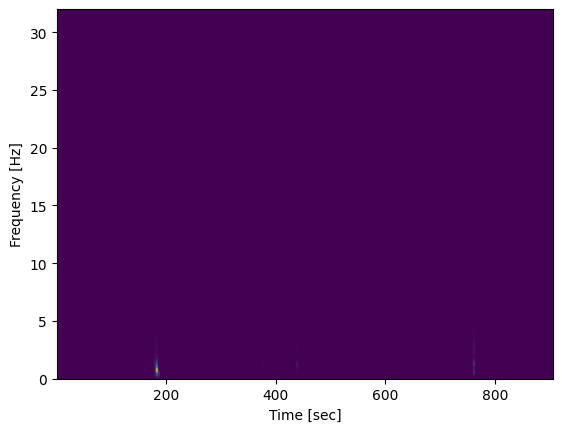

In [79]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

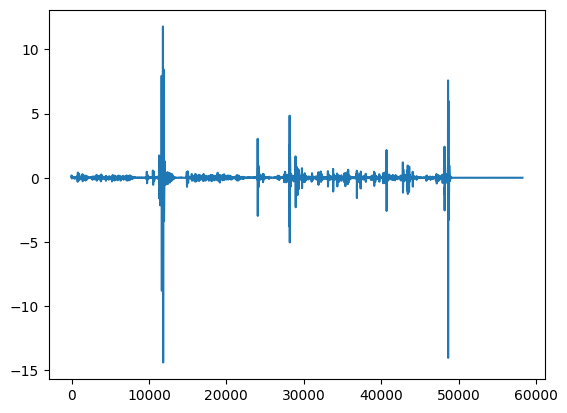

In [85]:
plt.plot(x)

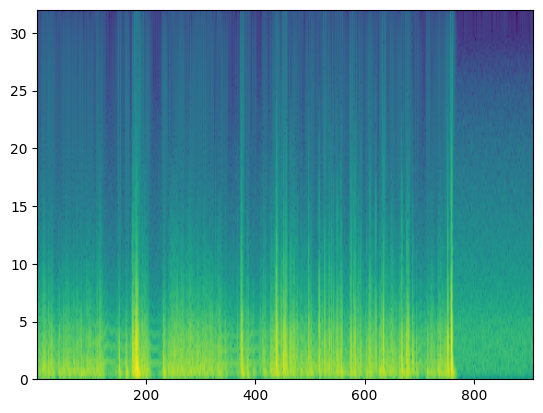

In [84]:
plt.specgram(np.array(x),Fs=64)